In [1]:
#%%capture
!pip install yfinance==0.2.58
#!pip install yfinance
#!pip install twelvedata
import numpy as np
import pandas as pd
import yfinance as yf
!pip show yfinance
from google.colab import drive
drive.mount('drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 557.7 kB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.65
    Uninstalling yfinance-0.2.65:
      Successfully uninstalled yfinance-0.2.65
Name: yfinance
Version: 0.2.58
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: /usr/local/lib/python3.11/dist-packages
Requires: beautifulsoup4, curl_cffi, frozendict, multitasking, numpy, pandas, peewee, platformdirs, pytz, requests
Required-by: 
Mounted at drive


In [2]:
from collections import defaultdict
topstocks = defaultdict(float)

[*********************100%***********************]  1 of 1 completed


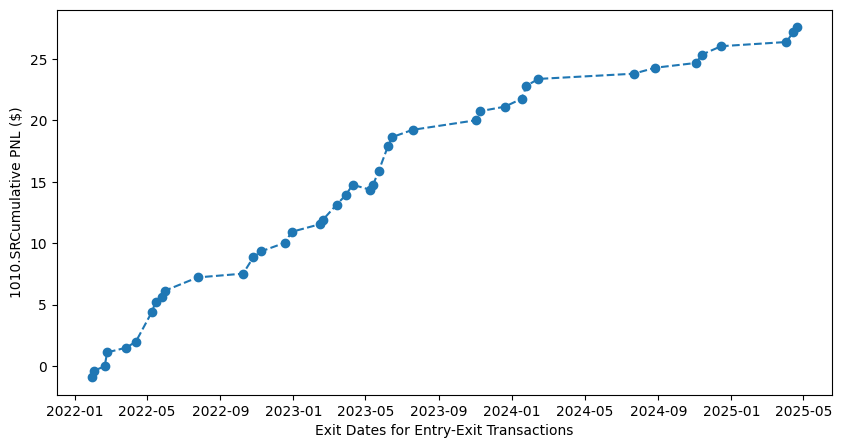

[*********************100%***********************]  1 of 1 completed


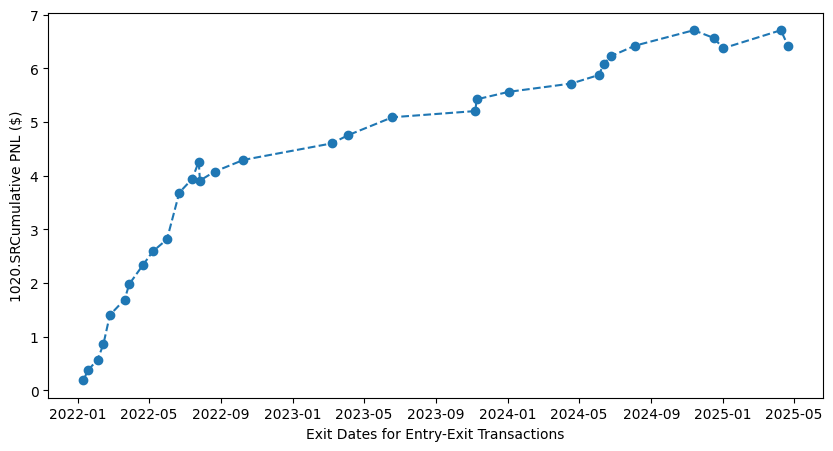

[*********************100%***********************]  1 of 1 completed


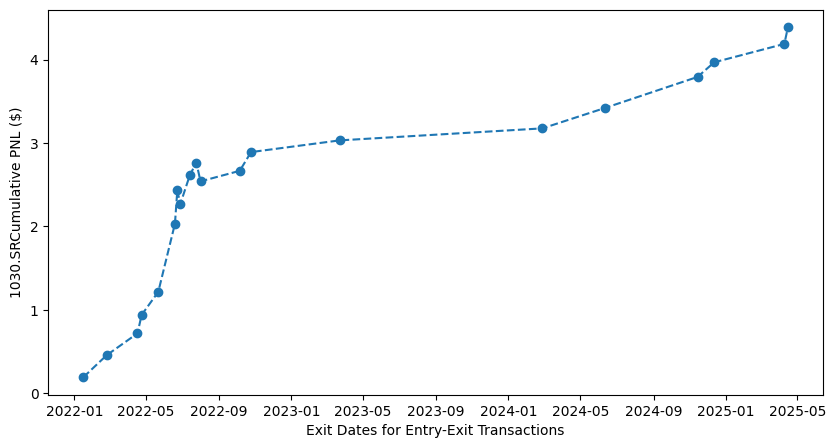

[*********************100%***********************]  1 of 1 completed


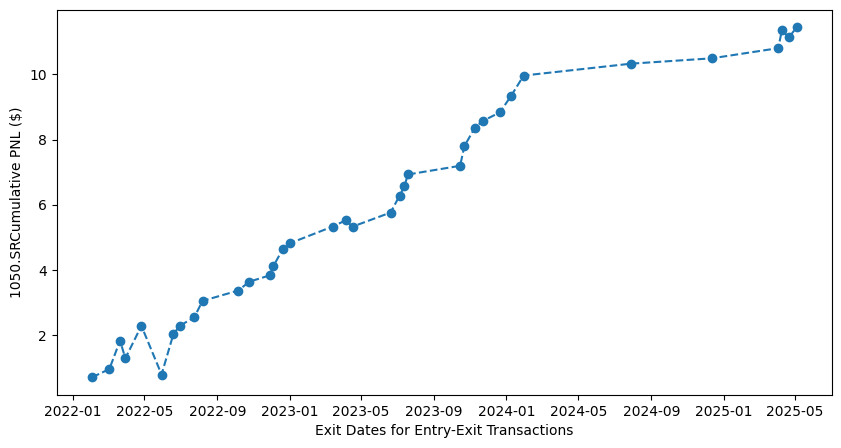

[*********************100%***********************]  1 of 1 completed


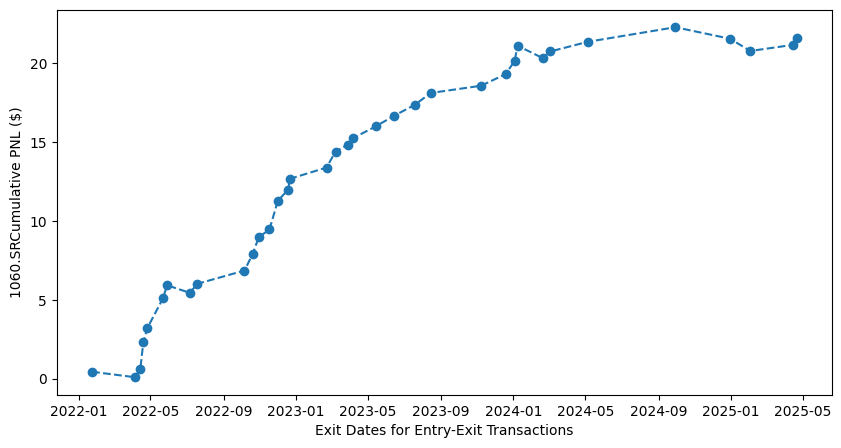

[*********************100%***********************]  1 of 1 completed


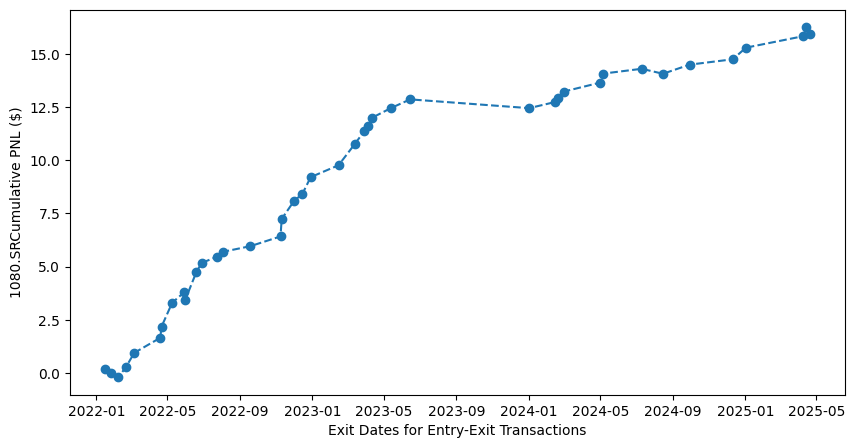

[*********************100%***********************]  1 of 1 completed


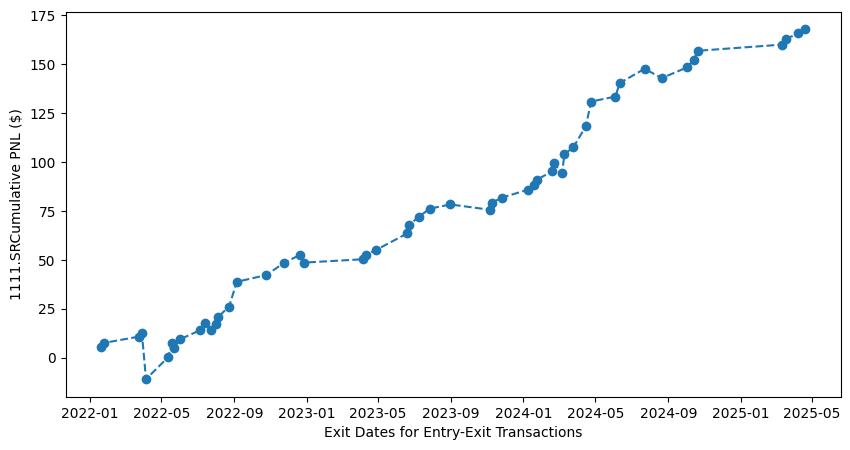

[*********************100%***********************]  1 of 1 completed


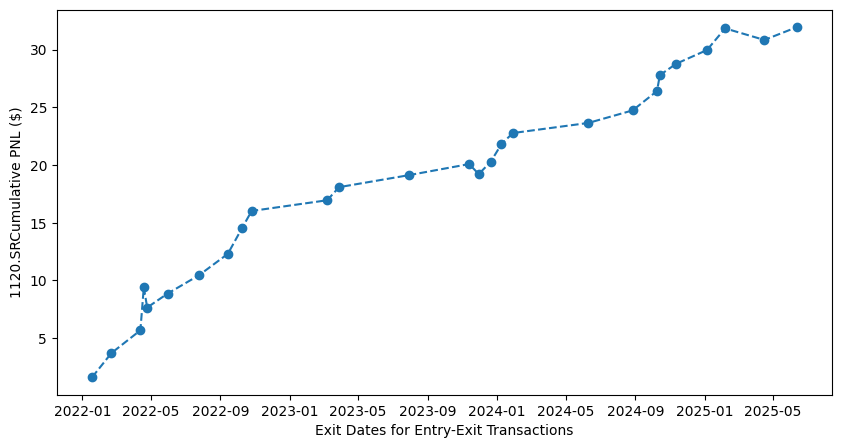

[*********************100%***********************]  1 of 1 completed


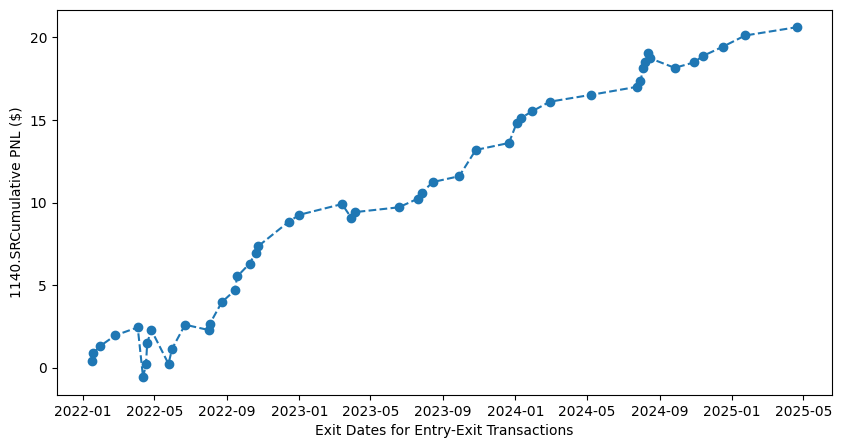

[*********************100%***********************]  1 of 1 completed


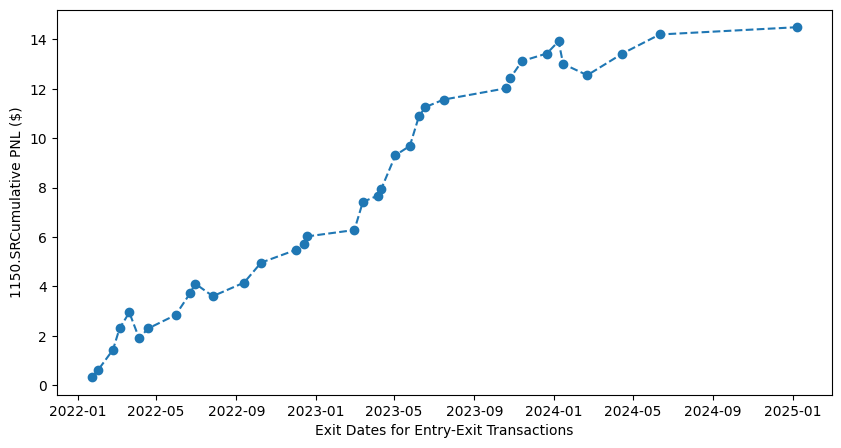

[*********************100%***********************]  1 of 1 completed


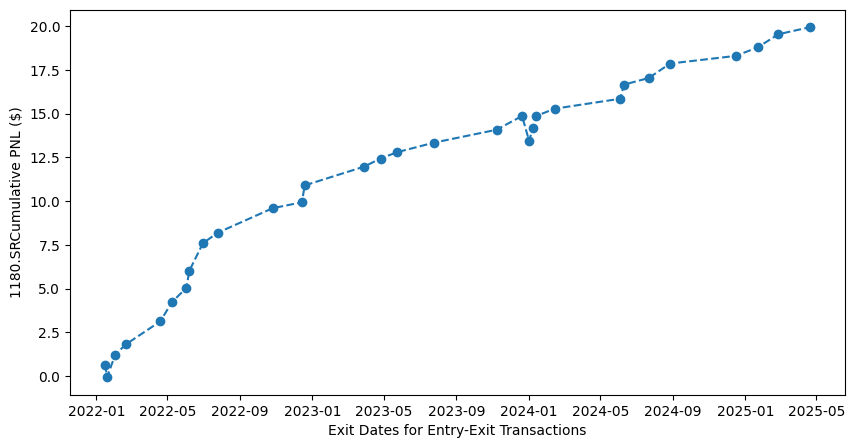

[*********************100%***********************]  1 of 1 completed


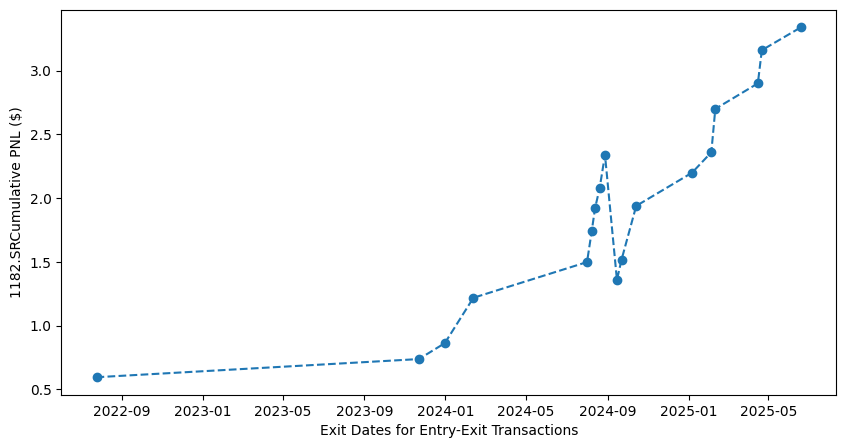

[*********************100%***********************]  1 of 1 completed


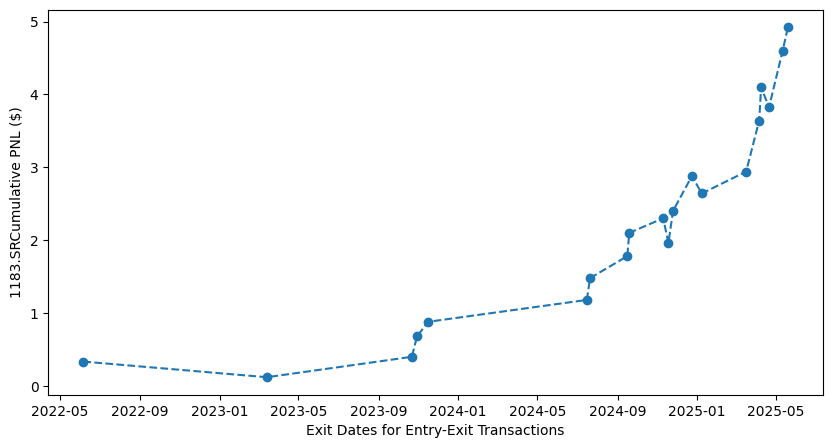

[*********************100%***********************]  1 of 1 completed


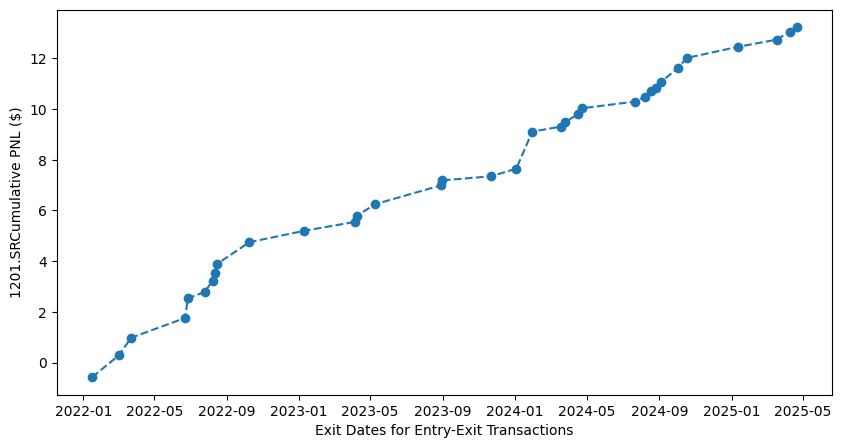

[*********************100%***********************]  1 of 1 completed


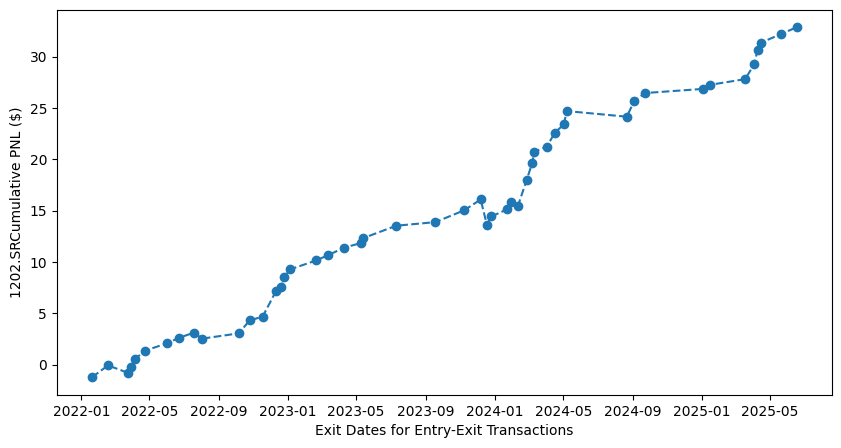

[*********************100%***********************]  1 of 1 completed


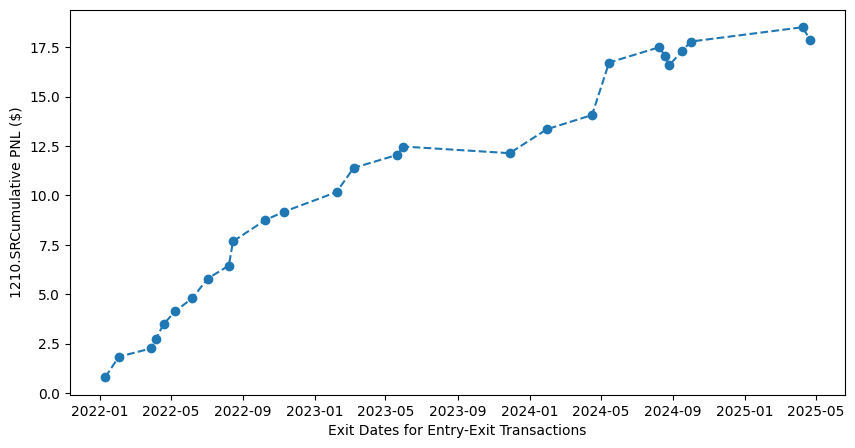

[*********************100%***********************]  1 of 1 completed


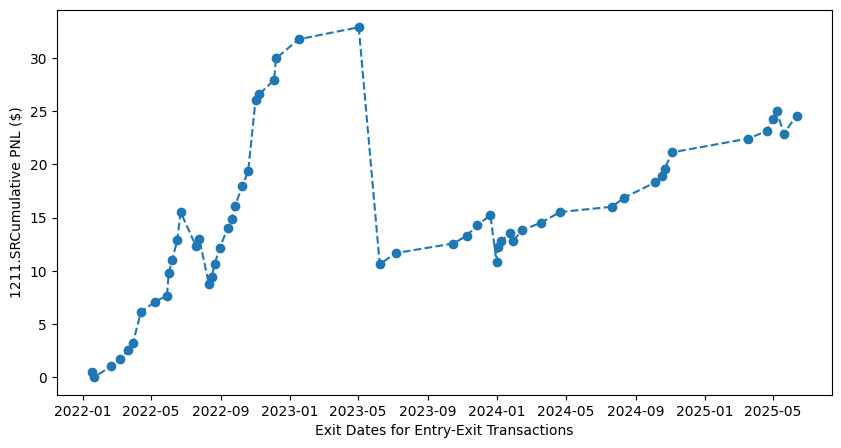

[*********************100%***********************]  1 of 1 completed


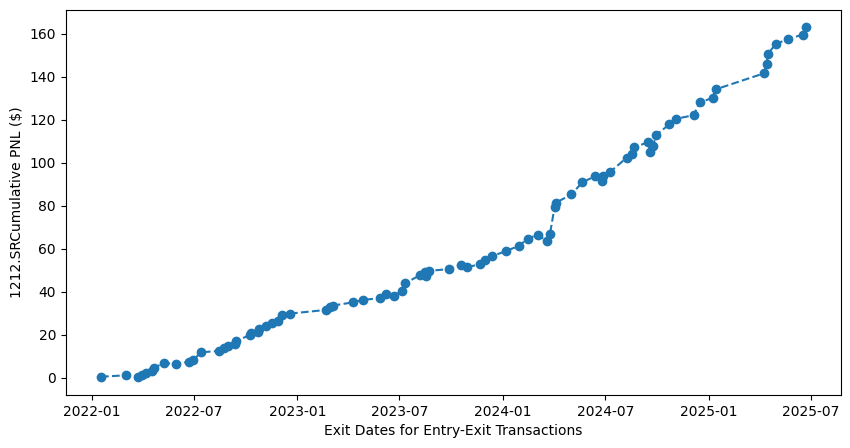

[*********************100%***********************]  1 of 1 completed


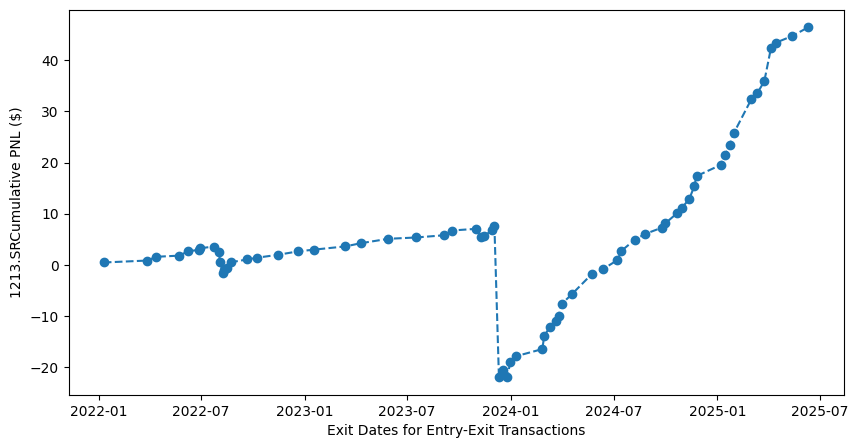

[*********************100%***********************]  1 of 1 completed


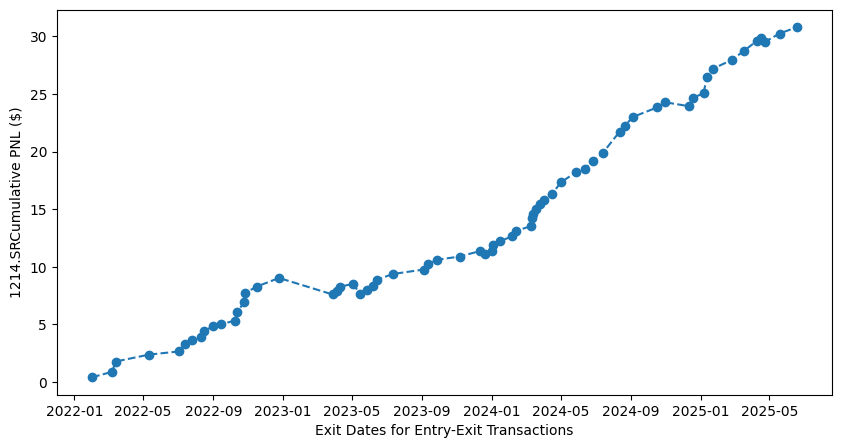

[*********************100%***********************]  1 of 1 completed


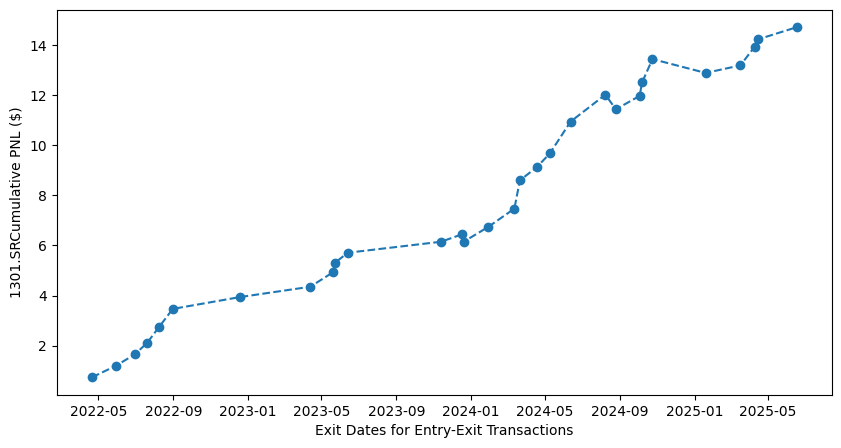

[*********************100%***********************]  1 of 1 completed


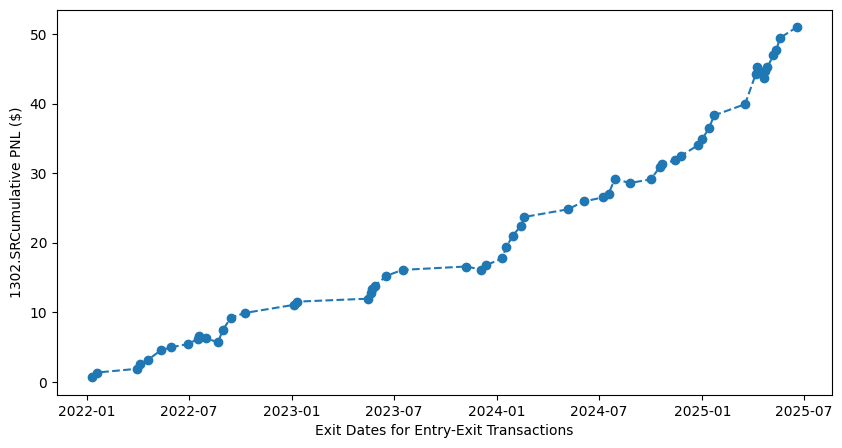

[*********************100%***********************]  1 of 1 completed


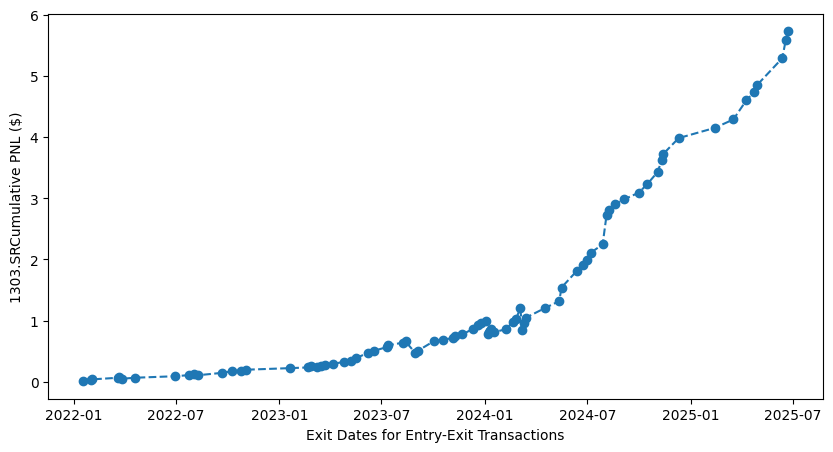

[*********************100%***********************]  1 of 1 completed


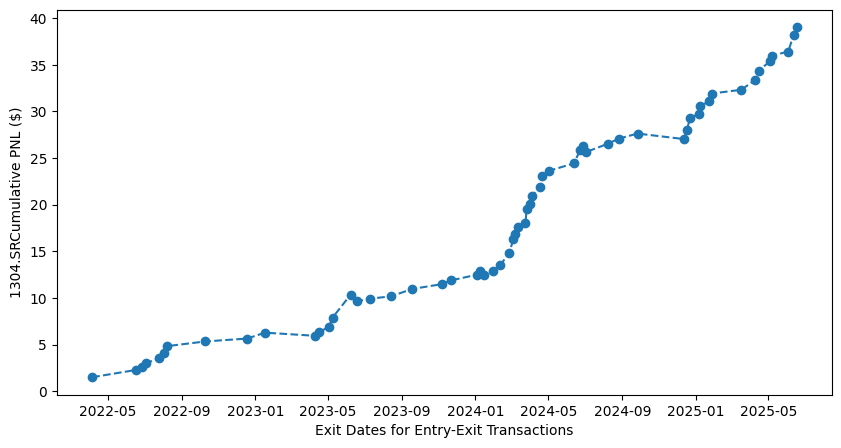

[*********************100%***********************]  1 of 1 completed


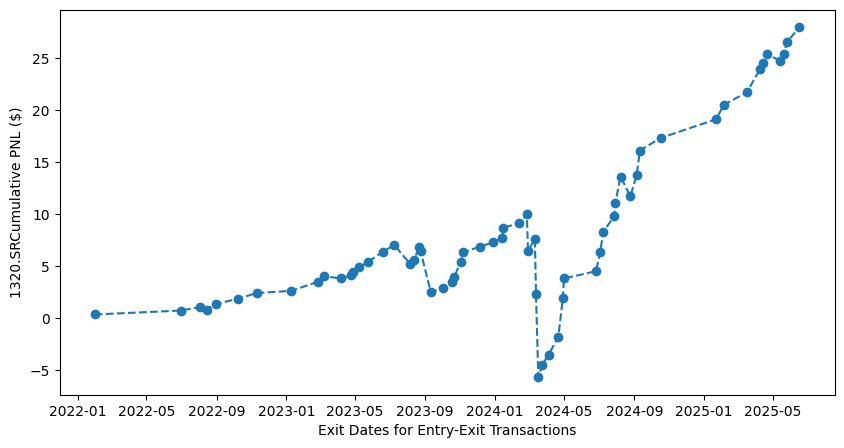

[*********************100%***********************]  1 of 1 completed


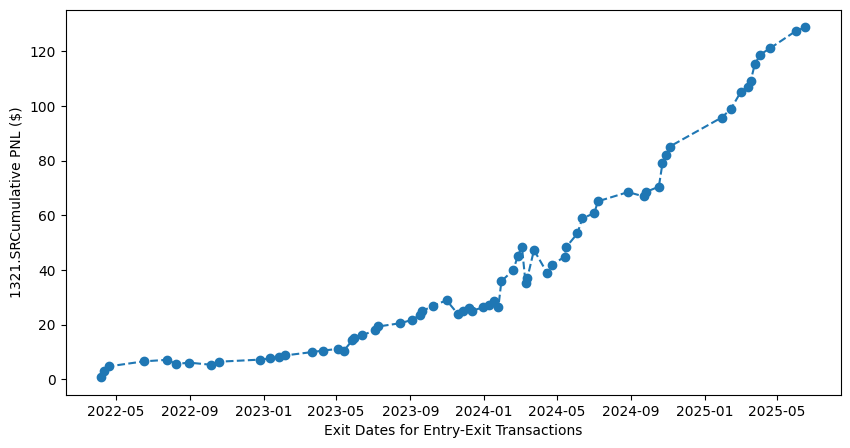

[*********************100%***********************]  1 of 1 completed


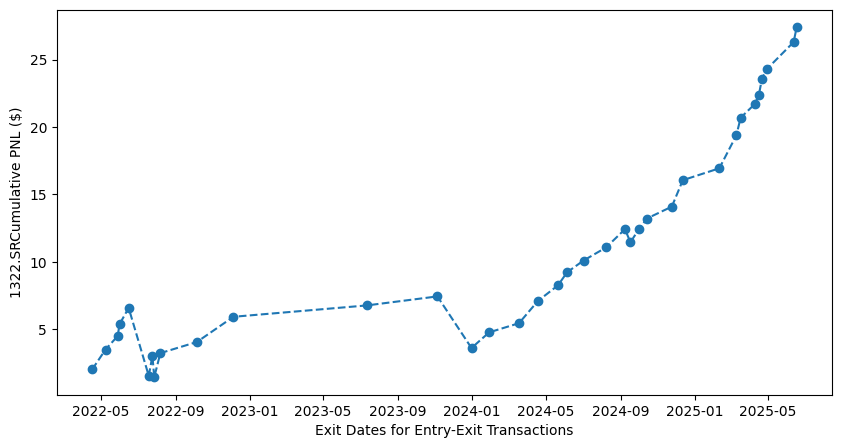

[*********************100%***********************]  1 of 1 completed


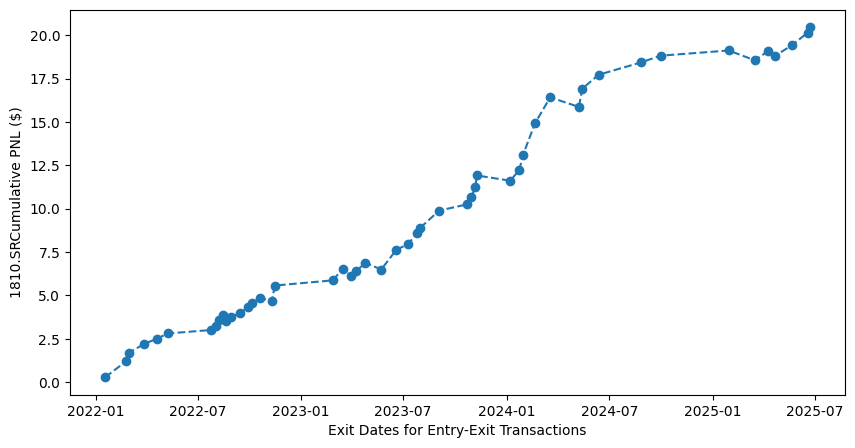

[*********************100%***********************]  1 of 1 completed


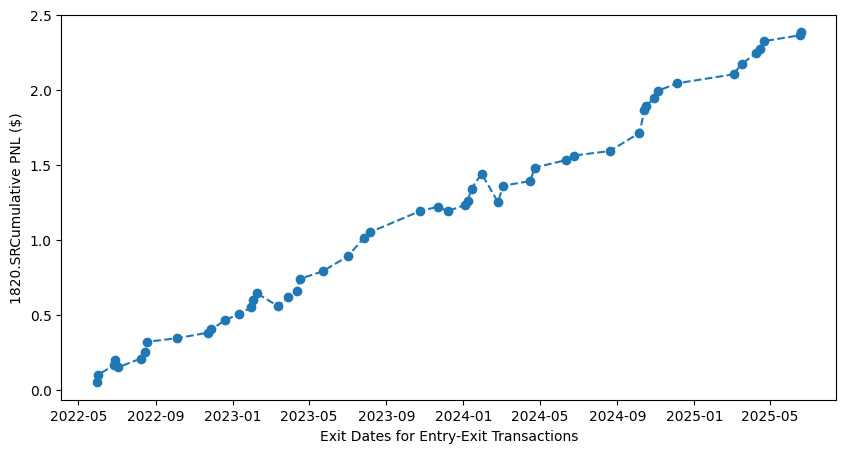

[*********************100%***********************]  1 of 1 completed


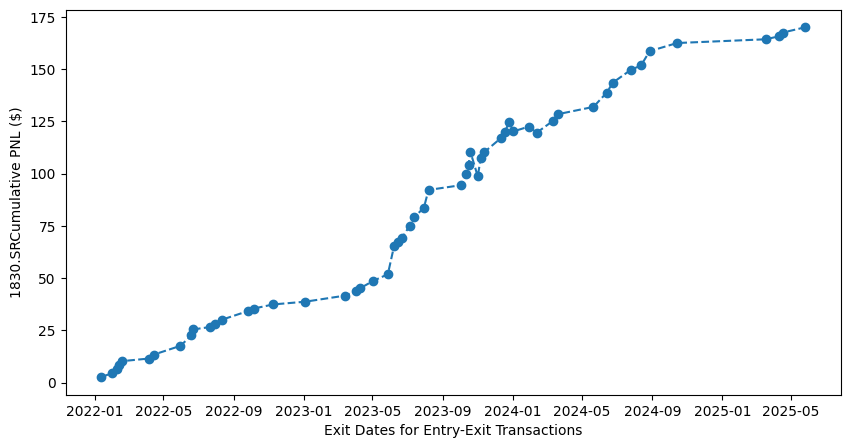

[*********************100%***********************]  1 of 1 completed


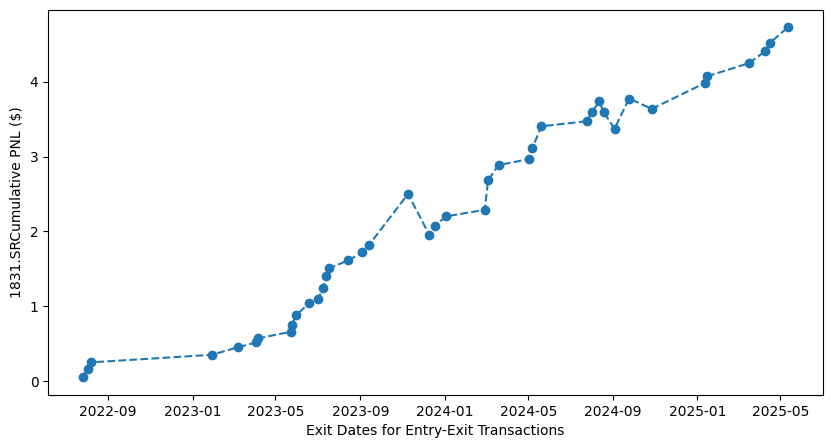

[*********************100%***********************]  1 of 1 completed


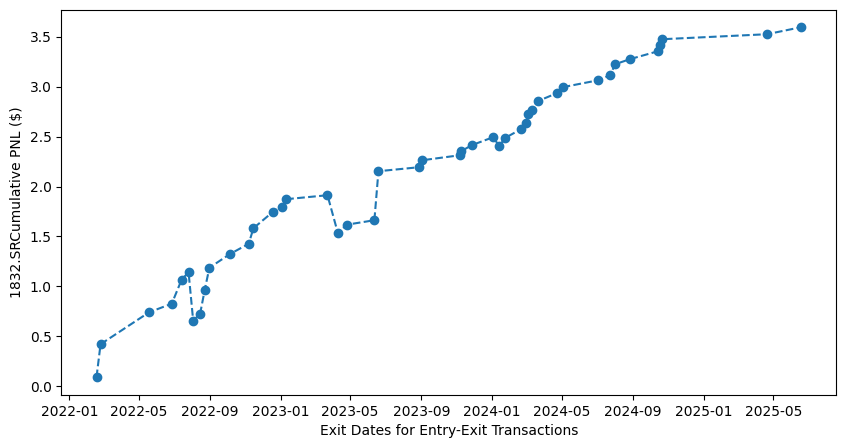

[*********************100%***********************]  1 of 1 completed


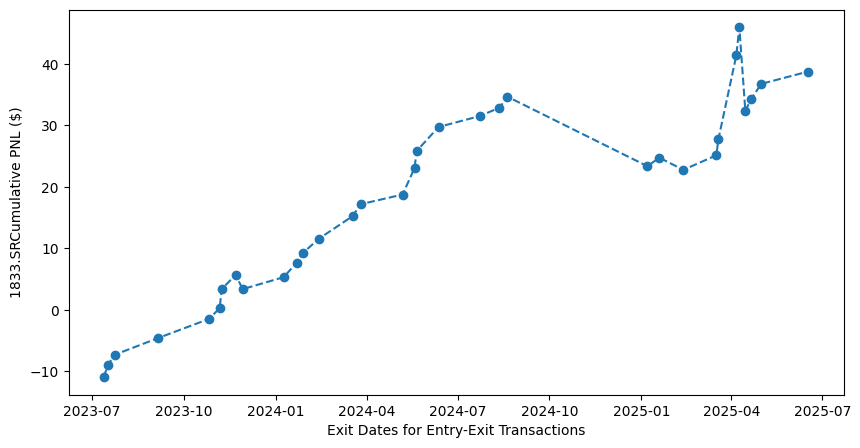

[*********************100%***********************]  1 of 1 completed


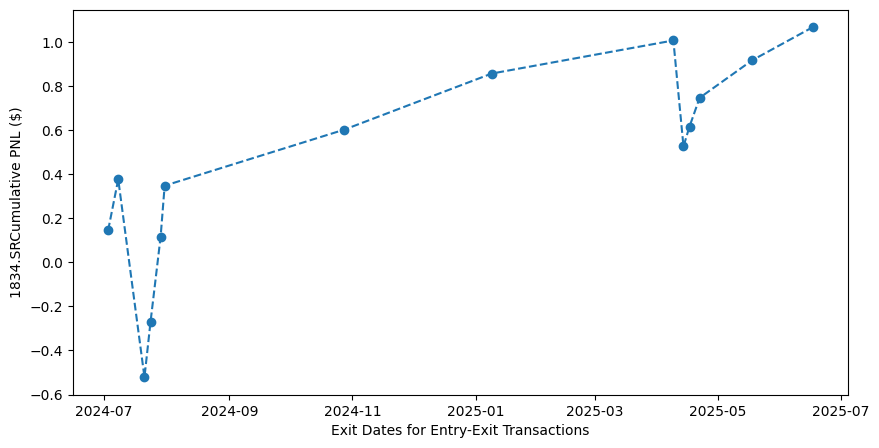

[*********************100%***********************]  1 of 1 completed


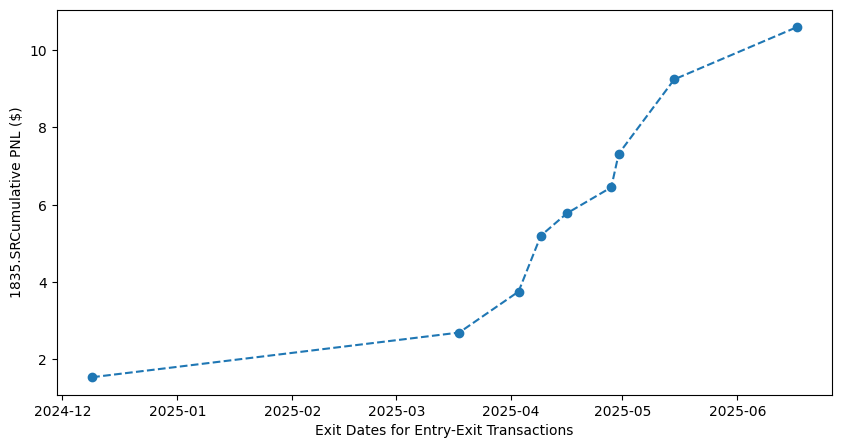

[*********************100%***********************]  1 of 1 completed


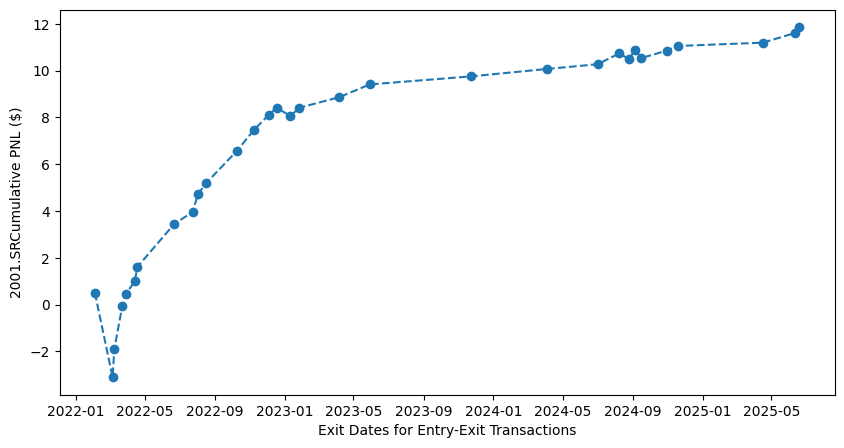

[*********************100%***********************]  1 of 1 completed


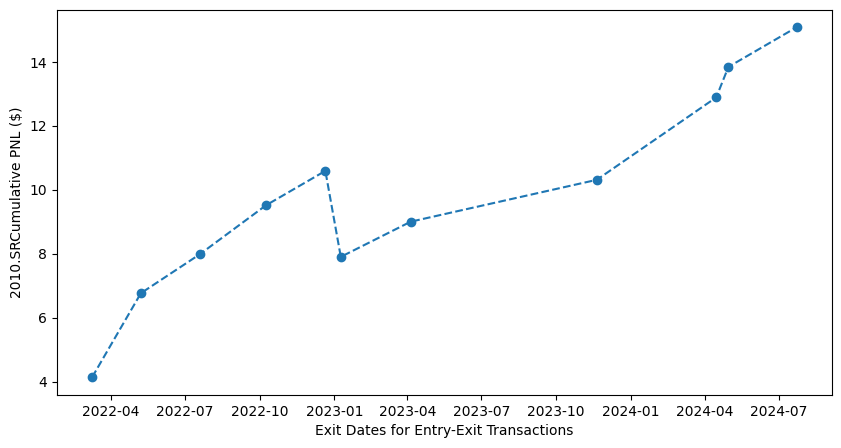

[*********************100%***********************]  1 of 1 completed


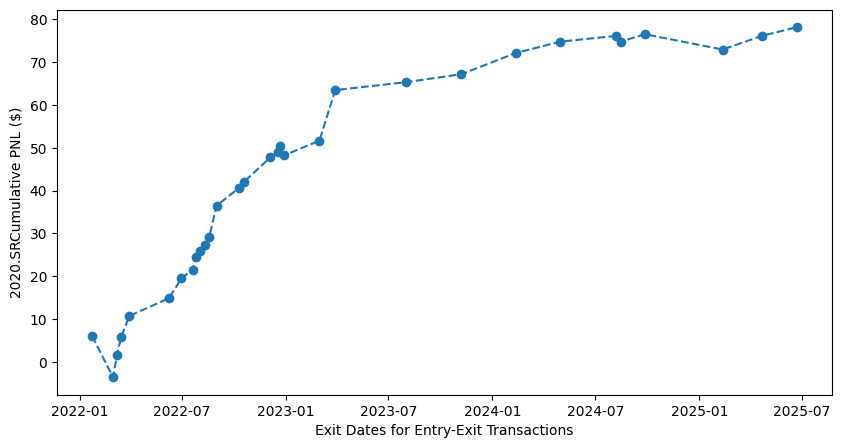

[*********************100%***********************]  1 of 1 completed


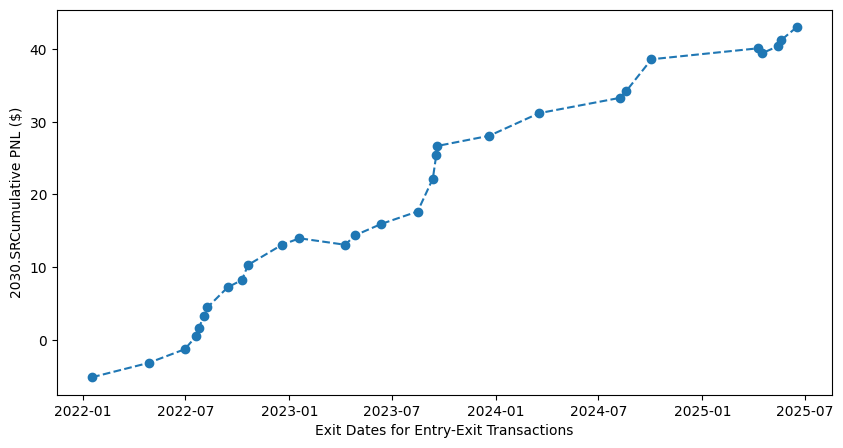

[*********************100%***********************]  1 of 1 completed


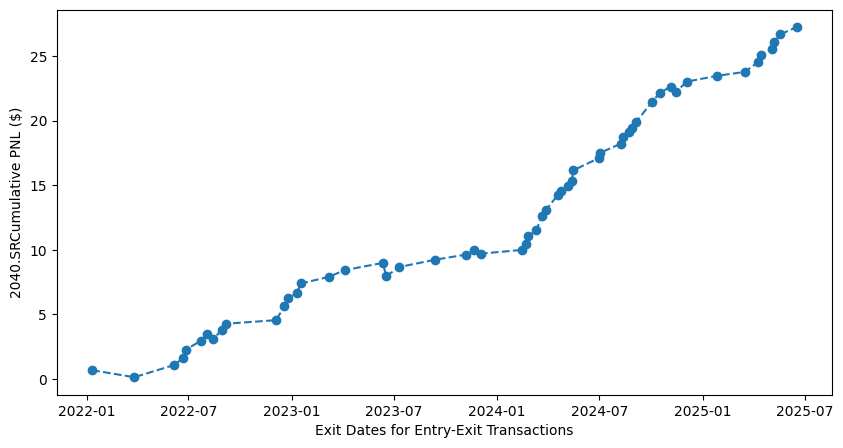

[*********************100%***********************]  1 of 1 completed


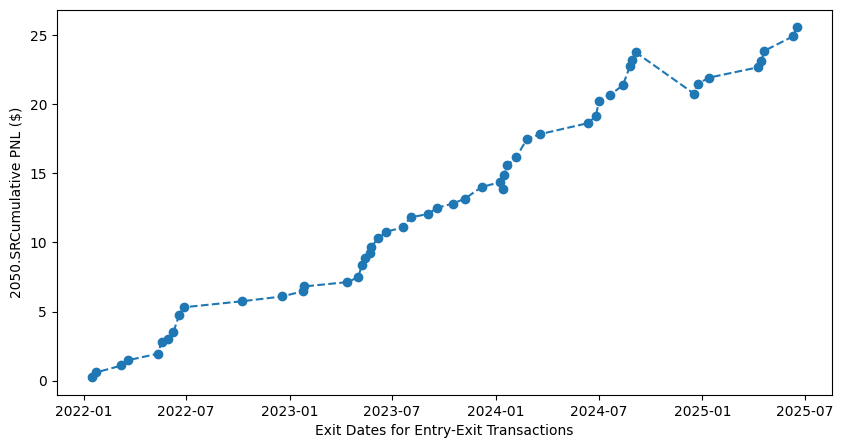

[*********************100%***********************]  1 of 1 completed


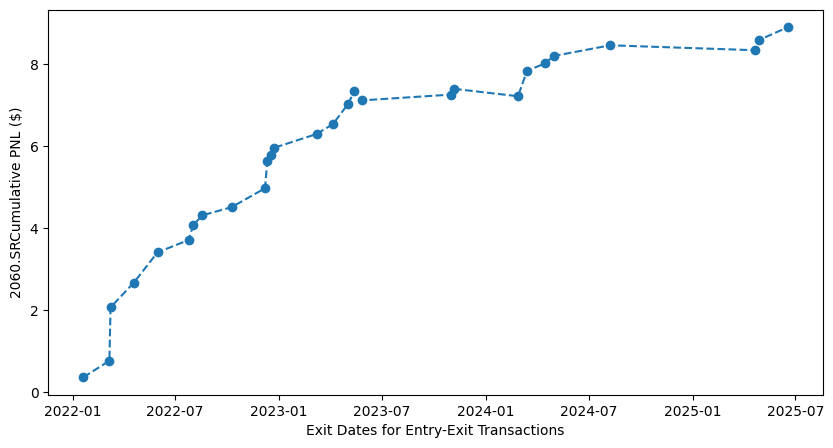

[*********************100%***********************]  1 of 1 completed


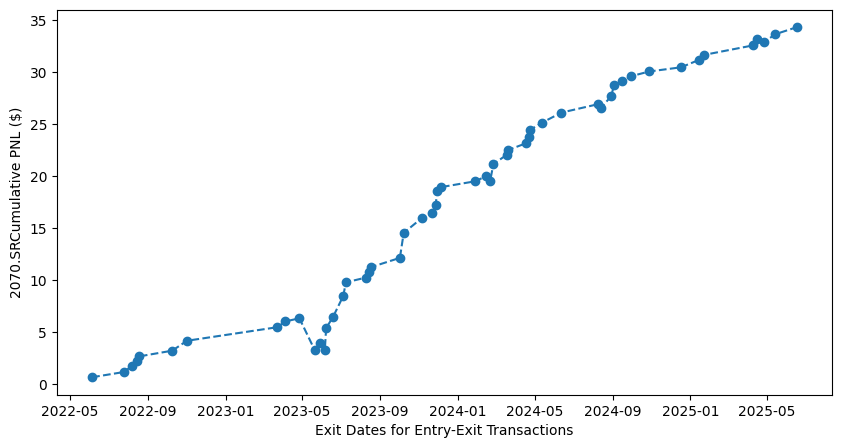

[*********************100%***********************]  1 of 1 completed


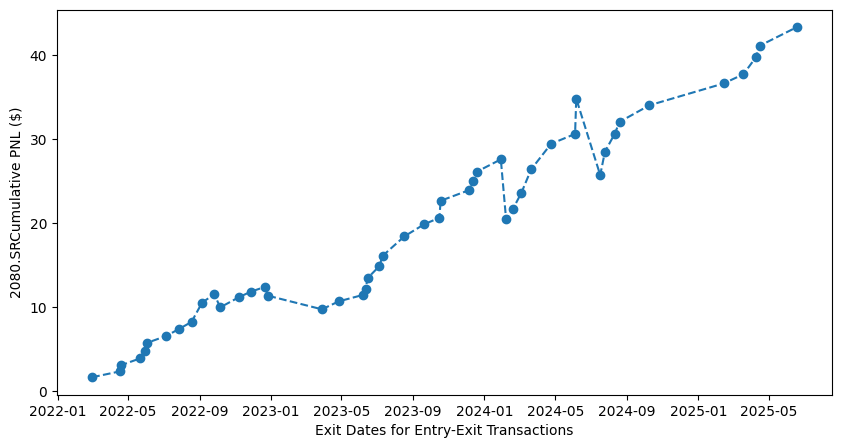

[*********************100%***********************]  1 of 1 completed


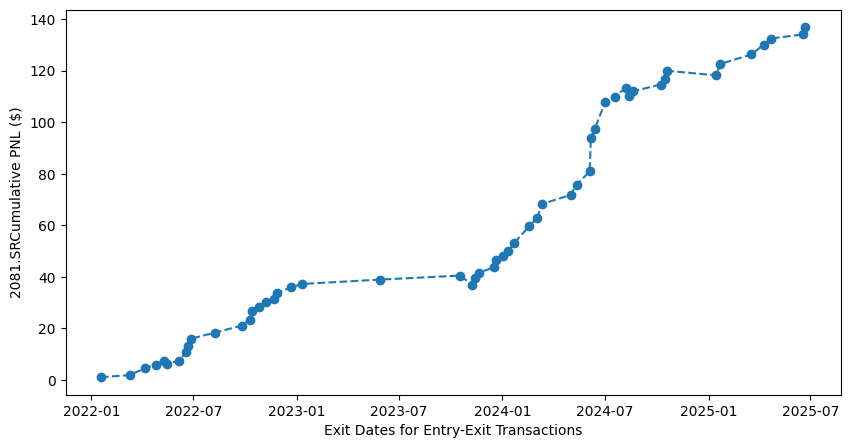

[*********************100%***********************]  1 of 1 completed


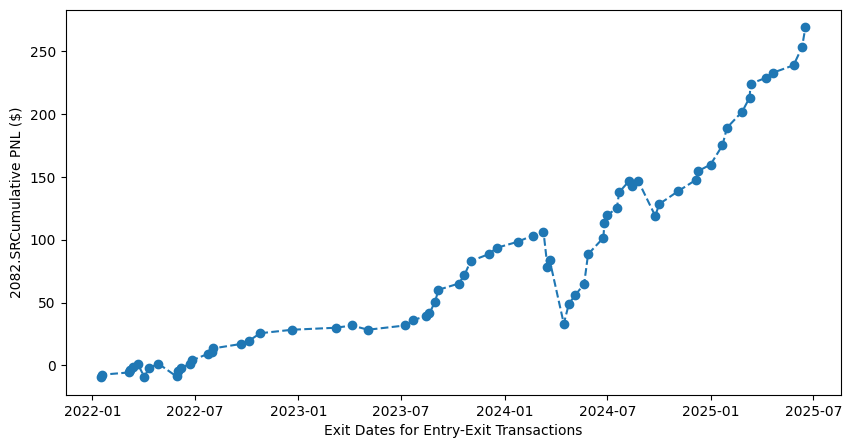

[*********************100%***********************]  1 of 1 completed


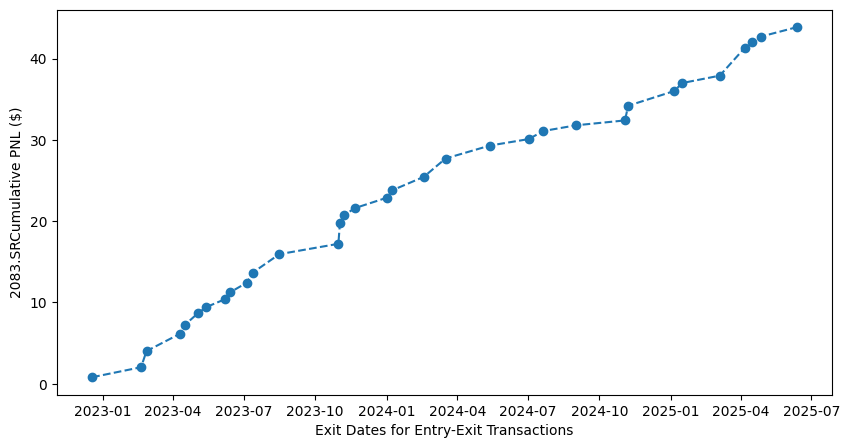

KeyboardInterrupt: 

In [4]:
#ticker = "1050.SR"
saudi_tickers = [1010,1020,1030,1050,1060,1080,1111,1120,1140,1150,1180,1182,1183,1201,1202,1210,1211,1212,1213,1214,1301,
                 1302,1303,1304,1320,1321,1322,1810,1820,1830,1831,1832,1833,1834,1835,2001,2010,2020,2030,2040,2050,2060,
                 2070,2080,2081,2082,2083,2084,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2222,
                 2223,2230,2240,2250,2270,2280,2281,2282,2283,2284,2285,2286,2290,2300,2310,2320,2330,2340,2350,2360,2370,
                 2380,2381,2382,3002,3003,3004,3005,3007,3008,3010,3020,3030,3040,3050,3060,3080,3090,3091,3092,4001,4002,
                 4003,4004,4005,4006,4007,4008,4009,4011,4012,4013,4014,4015,4016,4017,4018,4020,4030,4031,4040,4050,4051,
                 4061,4070,4071,4072,4080,4081,4082,4083,4090,4100,4110,4130,4140,4141,4142,4143,4150,4160,4161,4162,4163,
                 4164,4165,4170,4180,4190,4191,4192,4193,4200,4210,4220,4230,4240,4250,4260,4261,4262,4263,4270,4280,4290,
                 4291,4292,4300,4310,4320,4321,4322,4323,4324,5110,6001,6002,6004,6010,6012,6013,6014,6016,6017,6020,6040,
                 6050,6060,6070,6090,7010,7020,7030,7040,7200,7201,7202,7203,7204,8010,8012,8020,8030,8040,8050,8060,8070,
                 8100,8120,8150,8160,8170,8180,8190,8200,8210,8230,8240,8250,8260,8270,8280,8300,8310,8311,8313,9510,9513,
                 9514,9515,9516,9517,9518,9521,9522,9523,9524,9525,9527,9528,9530,9531,9532,9533,9534,9535,9536,9537,
                 9538,9539,9540,9541,9542,9543,9544,9545,9546,9547,9548,9549,9550,9551,9552,9553,9555,9556,9557,9558,9559,
                 9560,9561,9562,9563,9564,9565,9566,9567,9568,9569,9570,9571,9572,9574,9575,9577,9578,9579,9580,9581,9583,
                 9584,9585,9586,9587,9588,9589,9590,9591,9592,9593,9594,9595,9596,9597,9598,9599,9600,9601,9602,9603,9604,
                 9605,9606,9607,9608,9609,9610,9611,9612,9613,9614,9615,9616,9617,9618,9619,9620,9621,9622,9623,9625]
for numerical_part in saudi_tickers:
  ticker = str(numerical_part)
  ticker += '.'
  ticker += 'S'
  ticker += 'R'
  data = yf.download(ticker, start="2022-01-01", end="2025-06-23")
  # Find the lowest price for the stock over the last week
  data["prv_low_1"] = data["Low"].shift(1)
  data["prv_low_2"] = data["Low"].shift(2)
  data["prv_low_3"] = data["Low"].shift(3)
  data["prv_low_4"] = data["Low"].shift(4)
  data["prv_low_5"] = data["Low"].shift(5)
  data["Low_Last_5d"] = data[["prv_low_1", "prv_low_2","prv_low_3","prv_low_4","prv_low_5"]].values.min(1)
  data = data.drop(["prv_low_1", "prv_low_2", "prv_low_3", "prv_low_4", "prv_low_5"], axis=1)

  # Find the highest price for the stock over the last week
  data['prv_high_1'] = data["High"].shift(1)
  data['prv_high_2'] = data["High"].shift(2)
  data['prv_high_3'] = data["High"].shift(3)
  data['prv_high_4'] = data["High"].shift(4)
  data['prv_high_5'] = data["High"].shift(5)
  data["High_Last_5d"] = data[["prv_high_1", "prv_high_2","prv_high_3","prv_high_4","prv_high_5"]].values.max(1)
  data = data.drop(["prv_high_1", "prv_high_2", "prv_high_3", "prv_high_4", "prv_high_5"], axis=1)

  # Create boolean variable marking whether stock dropped at least six percent in the last week (five days)
  data["six_percent_of_close_price"] = .94*data["Close"]
  data["Close"] = 1*data["Close"]
  data["six_percent_of_close_price_within_last_five_days"] = np.where((data['Low_Last_5d'] <= data['six_percent_of_close_price']) & (data['six_percent_of_close_price'] <= data['High_Last_5d']), True, False)

  # Create boolean variable marking whether current close price is greater than yesterdays close price
  data["Last_Close"] = data["Close"].shift(1)
  data["close_diff"] = data["Close"].values.reshape(data.shape[0]) - data["Last_Close"].values.reshape(data.shape[0])
  data["up_from_yesterday"] = np.where((data["close_diff"] > 0), True, False)

  # Buy stock if price dropped at least seven percent in last week and current close price is greater than yesterdays close price
  data["shortsell"] = data["six_percent_of_close_price_within_last_five_days"] & data["up_from_yesterday"]
  data["shortsellcumsum"] = data["shortsell"].cumsum().astype('int64')
  data = data.drop(["Last_Close","close_diff","six_percent_of_close_price","up_from_yesterday","six_percent_of_close_price_within_last_five_days","Low_Last_5d","High_Last_5d"], axis=1)

  # Add numerical columns of stocks current close price increased and decrease by one percent for final analysis
  data["Close_up1%"] = 1.01*data["Close"]
  data["Close_down1%"] = .99*data["Close"]

  data.loc[(data.shortsell == False), 'Close_up1%'] = np.nan
  data.loc[(data.shortsell == False), 'Close_down1%'] = np.nan

  data["Close_up1%"] = data["Close_up1%"].ffill()
  data["Close_down1%"] = data["Close_down1%"].ffill()

  data["buyup"] = np.where((data["Close"].values.reshape(data.shape[0])-data["Close_up1%"].values.reshape(data.shape[0]) > 0),True,False)
  data["buydown"] = np.where((data["Close_down1%"].values.reshape(data.shape[0])-data["Close"].values.reshape(data.shape[0]) > 0),True,False)
  data["buy"] = data["buydown"]|data["buyup"]
  data["buycumsum"] = data["buy"].cumsum().astype('int64')

  data.to_csv("out.csv")
  data = pd.read_csv("out.csv")

  entry_exit_values = []
  dates = []
  buysellframe = None
  for x in range(1,int(data["shortsellcumsum"].max())+1):
    frame = data.loc[data.shortsellcumsum==x]
    if (frame.loc[frame.buy==True].shape[0]>=1):
      # create buysell dataframe
      if (buysellframe is None):
        buysellframe = frame.loc[frame.shortsell==True].iloc[0]
        buysellframe = pd.concat([buysellframe, frame.loc[frame.buy == True].iloc[0]], ignore_index=True,axis=1)
      else:
        buysellframe = pd.concat([buysellframe, frame.loc[frame.shortsell==True].iloc[0]], ignore_index=True,axis=1)
        buysellframe = pd.concat([buysellframe, frame.loc[frame.buy == True].iloc[0]], ignore_index=True,axis=1)
      ssclose = float(frame.loc[frame.shortsell==True]["Close"].to_list()[0]) + .0014*(float(frame.loc[frame.shortsell==True]["Close"].to_list()[0]))
      buyclose = float(frame.loc[frame.buy==True]["Close"].to_list()[0]) + 0.0014*(float(frame.loc[frame.buy==True]["Close"].to_list()[0]))
      entry_exit_values.append(ssclose-buyclose)
      dates.append(frame.loc[frame.buy==True]["Price"].to_list()[0])
  buysellframe = buysellframe.T
  # Save Entry and Exit points for Ticker
  entryexitfile = "/content/drive/My Drive/"
  entryexitfile += ticker.split('.')[0]
  entryexitfile += "_entryexit.csv"
  buysellframe.to_csv(entryexitfile)

  def cumlative_pnl(entry_exit_values):
    cumpnl = 0
    pnl = []
    for num in entry_exit_values:
      cumpnl += num
      pnl.append(cumpnl)
    return pnl


  import datetime as dt
  from datetime import datetime

  pnl = cumlative_pnl(entry_exit_values=entry_exit_values)
  #pnl = [diff*115 for diff in pnl]

  date_objects = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in dates]

  #print(date_objects)
  #print(pnl)

  import matplotlib.pyplot as plt
  f = plt.figure()
  f.set_figwidth(10)
  f.set_figheight(5)
  plt.plot(date_objects, pnl,marker='o', linestyle='dashed')
  plt.xlabel('Exit Dates for Entry-Exit Transactions')
  plt.ylabel(ticker + 'Cumulative PNL ($)')
  plt.show()
  #topstocks[ticker] = pnl[len(pnl)-1]/finalbuyclose

In [ ]:
count = 0
for key, value in sorted(topstocks.items(), key=lambda item: item[1], reverse=True):
    if (count > 49):
      break
    print("%s: %s" % (key, value))
    count += 1

9544.SR: 11.855045804802694
9510.SR: 6.351249694824219
9533.SR: 5.937209994293924
9537.SR: 5.321202843795747
2160.SR: 4.7444962375947215
9568.SR: 4.013288944704712
8311.SR: 3.451668882150014
9522.SR: 3.284374793370564
9547.SR: 3.127272794829352
4130.SR: 3.06410597264294
9538.SR: 2.9510639271837604
9531.SR: 2.9065651327876725
9513.SR: 2.8932035194286847
9523.SR: 2.640097859252544
9558.SR: 2.587244515121671
9516.SR: 2.5559788151158602
8180.SR: 2.4979122808095577
9542.SR: 2.3651877393655036
8050.SR: 2.3379141326583652
8310.SR: 2.323193522943694
4071.SR: 2.3187909161645828
9524.SR: 2.2729237113867766
4323.SR: 2.2617580465464924
9536.SR: 2.2346402573934423
2100.SR: 2.1277485830455247
9532.SR: 2.1212549681871207
9572.SR: 2.1185369265567386
9539.SR: 2.1119895706480403
9521.SR: 2.0288189358181423
6050.SR: 1.8660265044010675
9541.SR: 1.8620972583638906
9565.SR: 1.846410994071872
8270.SR: 1.737287533922581
8150.SR: 1.7237760602562129
8300.SR: 1.6995578741524064
4002.SR: 1.694283862837248
2310.SR